In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

In [3]:
df= pd.read_csv('../../datasets/abalone.data.csv')
df

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
#checking for missing values
df.isna().sum()

gender            0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
#renaming columns
df.columns= map(lambda col: col.lower().replace(' ', '_') , df.columns.to_list())
df.columns

Index(['gender', 'length', 'diameter', 'height', 'whole_weight',
       'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [6]:
#checking if scaling is required
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
X_train= df[['length', 'diameter', 'height', 'shell_weight', 'whole_weight', 'shucked_weight']].to_numpy()
Y_train= df['rings'].to_numpy().reshape(-1, 1)

In [8]:
def compute_cost(y_train, y_pred):
    m= len(y_train)
    return 1/(2*m) * np.sum((y_pred - y_train)**2)

In [9]:
def gradient_descent(X_train, y_train, W_b, alpha, epochs):
    m= len(y_train)
    cost_history= []
    X_train_b= np.c_[np.ones(m) , X_train]

    for i in range(epochs):
        y_pred= X_train_b @ W_b
        J= compute_cost(y_train, y_pred)
        cost_gradient= (1/m)* (X_train_b.T @ (y_pred - y_train))   
        W_b= W_b- cost_gradient* alpha 

        if(i%10==0):
            cost_history.append(J)

    return W_b, cost_history


In [10]:
W_b_init= np.zeros((1+ X_train.shape[1], 1))

#running gradient descent
W_b, cost_hist= gradient_descent(X_train, Y_train, W_b_init, 0.001, 15000)

In [11]:
cost_hist[-1]

np.float64(3.508362179607771)

Text(0.5, 1.0, 'At the tail')

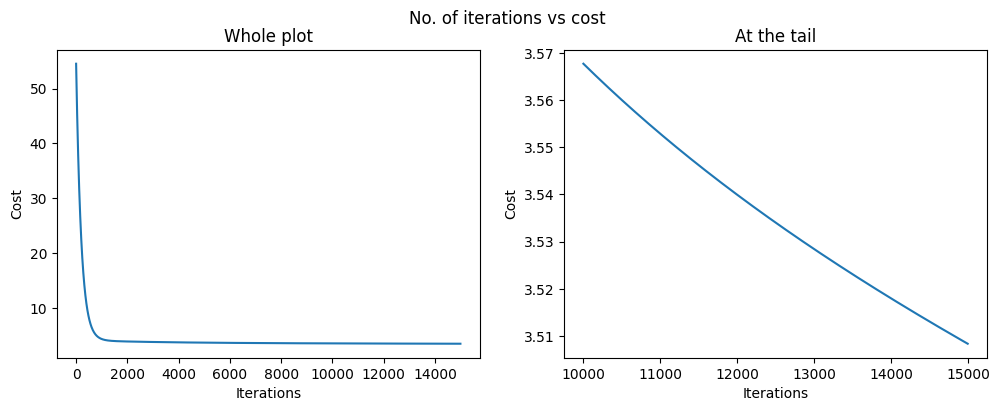

In [12]:
fig, (ax0, ax1)= plt.subplots(1, 2, figsize= (12,4))
fig.suptitle('No. of iterations vs cost')

iters= np.arange(0, 15000, 10)
ax0.plot(iters, cost_hist) 
ax0.set_xlabel('Iterations')
ax0.set_ylabel('Cost')
ax0.set_title('Whole plot')

ax1.plot(np.arange(1000, len(cost_hist))* 10 , cost_hist[1000:])
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
ax1.set_title('At the tail')


In [13]:
#evaluation
X_train_b= np.c_[np.ones(X_train.shape[0]), X_train]
y_pred= X_train_b @ W_b

r2_score= r2_score(Y_train, y_pred)
rmse= root_mean_squared_error(Y_train, y_pred)


In [14]:
print(f'r2_score= {r2_score}')
print(f'rmse= {rmse}')

r2_score= 0.32486401586914193
rmse= 2.6488748366482557
